In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score

In [2]:
df=pd.read_csv(r"C:\Users\NTCUONG\notebook\training_LR\training9.csv")
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,SalePrice
0,0.150094,0.245503,0.823713,0.467041,0.277781,0.452097,0.448408,0.101483,0.326545,0.0,...,0.456083,0,0.000000,0.0,0.0,0.0,0.456083,0.0,0,208500
1,0.043703,0.275451,0.858747,0.357852,0.408238,0.401561,0.398284,0.000000,0.409536,0.0,...,0.412913,0,0.000000,0.0,0.0,0.0,0.412913,0.0,0,181500
2,0.118369,0.200515,0.890164,0.365548,0.217228,0.353258,0.350562,0.066415,0.177987,0.0,...,0.361126,0,0.000000,0.0,0.0,0.0,0.361126,0.0,0,223500
3,0.159661,0.203803,0.859960,0.423637,0.251885,0.391060,0.399603,0.000000,0.091011,0.0,...,0.415474,0,0.417033,0.0,0.0,0.0,0.000000,0.0,0,140000
4,0.094960,0.199563,0.918120,0.335099,0.172546,0.280525,0.278236,0.115649,0.193337,0.0,...,0.291058,0,0.000000,0.0,0.0,0.0,0.291058,0.0,0,250000


In [3]:
corr=df.corr()

In [4]:
df.corr().sort_values("SalePrice",ascending=False).head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,SalePrice
SalePrice,-0.187647,-0.150612,0.228492,0.030433,-0.394900,-0.393929,-0.401973,0.286089,0.209935,-0.056868,...,-0.423426,NaN,-0.139545,-0.051458,-0.030231,-0.049619,-0.338044,0.273673,NaN,1.000000
BsmtQual_Ex,-0.019162,0.029625,-0.004661,0.153260,-0.114671,-0.048726,-0.053646,0.226263,0.196354,-0.036025,...,-0.206695,NaN,-0.045265,-0.014686,-0.024430,-0.031567,-0.170257,0.307506,NaN,0.451608
KitchenQual_Ex,-0.008671,-0.015889,-0.001595,0.123222,-0.057121,-0.059439,-0.059953,0.120338,0.146168,-0.038462,...,-0.133922,NaN,0.049378,-0.013164,-0.021899,-0.028297,-0.165153,0.190471,NaN,0.409421
ExterQual_Ex,-0.043465,-0.002081,0.037454,0.084736,-0.084612,-0.086550,-0.088374,0.216657,0.111300,-0.034108,...,-0.192771,NaN,-0.046799,-0.009523,-0.015841,-0.020469,-0.160383,0.240313,NaN,0.404878
Neighborhood_NridgHt,0.079830,0.011417,-0.060334,0.180990,-0.053661,0.014349,0.010042,0.207970,0.098621,-0.051179,...,-0.091817,NaN,-0.056647,-0.011527,-0.019174,-0.024776,-0.048898,0.173688,NaN,0.313647
ExterQual_Gd,0.244144,0.127291,-0.271118,0.500648,0.062334,0.222969,0.213852,0.138024,0.093554,-0.080887,...,0.020290,NaN,-0.045175,-0.033648,-0.050994,-0.038926,0.054771,0.242718,NaN,0.307234
Foundation_PConc,0.294030,0.138138,-0.309576,0.539514,0.079992,0.286325,0.275757,0.187246,0.134822,-0.131092,...,0.067493,NaN,-0.068619,0.020954,-0.042032,-0.034403,0.078990,0.286249,NaN,0.306703
Fireplaces,0.063250,0.047981,-0.071323,0.203926,-0.014197,0.007862,0.003995,0.146287,0.132208,-0.002821,...,-0.008842,NaN,-0.092457,-0.046835,-0.022880,-0.004424,0.044421,0.036288,NaN,0.296400
Neighborhood_NoRidge,-0.053253,0.002040,0.061684,-0.005377,-0.120317,-0.107713,-0.110160,0.197925,0.082584,-0.044654,...,-0.039500,NaN,-0.001196,-0.008586,-0.014284,-0.018456,-0.044507,-0.047499,NaN,0.292830
MasVnrArea,0.226652,0.020592,-0.232376,0.282195,0.032106,0.138909,0.130019,1.000000,0.209548,-0.087016,...,0.046362,NaN,-0.007775,-0.012815,0.015781,0.050269,0.038061,0.075631,NaN,0.286089


In [5]:
def create_df(col_list):
    df_fs=df["SalePrice"]
    for col in col_list:
        df_fs=pd.concat([df[col],df_fs],axis=1)
    return df_fs

In [6]:
model=DecisionTreeRegressor(criterion='absolute_error',splitter='random',max_features='log2')

In [7]:
def eval(df_fs):
    X_train,X_test,y_train,y_test=train_test_split(df_fs.iloc[:,:-1],df_fs.iloc[:,-1],test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    k.append(i)
    mae.append(mean_absolute_error(y_test,y_pre))
    rmse.append(root_mean_squared_error(y_test,y_pre))
    r2.append(r2_score(y_test,y_pre))

### FEATURE SELECTION DEPEND ON CORRELATION MATRIX

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm')

In [8]:
c=corr.sort_values("SalePrice",ascending=False).head(10).index
c

Index(['SalePrice', 'BsmtQual_Ex', 'KitchenQual_Ex', 'ExterQual_Ex',
       'Neighborhood_NridgHt', 'ExterQual_Gd', 'Foundation_PConc',
       'Fireplaces', 'Neighborhood_NoRidge', 'MasVnrArea'],
      dtype='object')

In [9]:
k, mae, rmse, r2 = [], [], [], []
for i in range(10,120):
    c=corr.sort_values("SalePrice",ascending=False).iloc[1:i,:].index
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,10,39506.606164,60953.980698,0.515615
1,11,37280.010274,54055.073993,0.619058
2,12,41838.506849,70993.734780,0.342908
3,13,36473.479452,52758.860439,0.637108
4,14,36475.018836,59573.025987,0.537315
...,...,...,...,...
105,115,39472.304795,62434.735095,0.491795
106,116,41941.263699,71395.078304,0.335458
107,117,44535.657534,72255.735721,0.319339
108,118,40030.558219,66158.916175,0.429359


In [10]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
25,35,32760.750000,50603.492917,0.666153
79,89,33407.750000,53945.348770,0.620603
50,60,33580.219178,52716.295904,0.637694
12,22,33804.674658,49986.192873,0.674249
31,41,34143.979452,49170.128979,0.684798
...,...,...,...,...
107,117,44535.657534,72255.735721,0.319339
71,81,44564.931507,81314.232046,0.137976
8,18,44780.315068,70647.246313,0.349306
90,100,44828.277397,74738.071243,0.271768


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_21624\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_21624\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


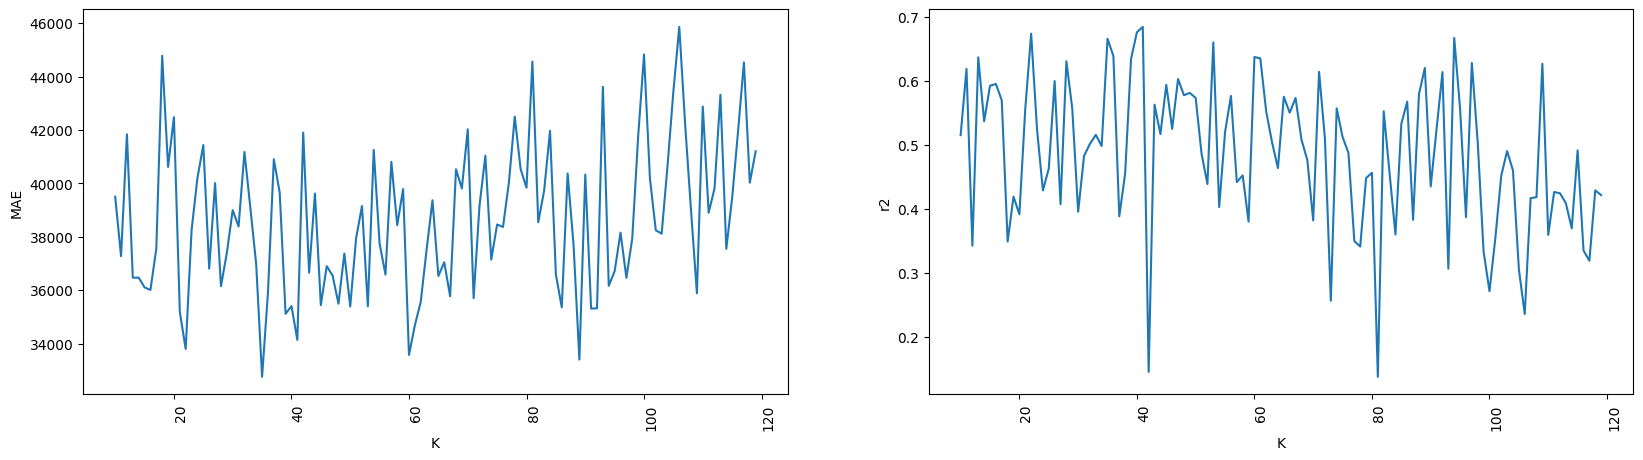

In [11]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### FEATURE SELECTION BY REMOVE FEATURE WITH LOW VARIENCE


### 1.CALCULATE VARIENCE FOR EACH FEATURE

In [12]:
varr=np.var(df)
varr

D:\miniconda\lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


MSSubClass               3.261382e-02
LotFrontage              5.107832e-03
LotArea                  2.617346e-02
OverallQual              2.393219e-02
OverallCond              1.685412e-02
                             ...     
SaleCondition_Family     3.132392e-03
SaleCondition_Normal     4.913976e-02
SaleCondition_Partial    2.113360e-02
SaleCondition_nan        0.000000e+00
SalePrice                6.306789e+09
Length: 305, dtype: float64

In [13]:
varr.loc[varr > 0.1].index

Index(['SalePrice'], dtype='object')

### 2.USING VarianceThreshold FROM SKLEARN

In [14]:
from sklearn.feature_selection import VarianceThreshold

In [15]:
varr_thresh=VarianceThreshold(threshold=0.1)
varr_thresh.fit_transform(df)
selected_columns = df.columns[varr_thresh.get_support()]
selected_columns

Index(['SalePrice'], dtype='object')

In [16]:
k, mae, rmse, r2 = [], [], [], []
for i in range(100,500):
    varr_thresh=VarianceThreshold(threshold=i/100000)
    varr_thresh.fit_transform(df.iloc[:,:-1])
    selected_columns = df.iloc[:,:-1].columns[varr_thresh.get_support()]
    df_fs=create_df(selected_columns)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,100,39637.599315,61947.701398,0.499693
1,101,39204.321918,64838.189289,0.451915
2,102,38578.003425,58387.006024,0.555554
3,103,38275.222603,60927.123985,0.516042
4,104,38063.013699,61248.519977,0.510923
...,...,...,...,...
395,495,40454.006849,66472.850635,0.423931
396,496,36719.544521,58981.010406,0.546465
397,497,37077.770548,57894.717192,0.563018
398,498,36956.715753,57532.377684,0.568470


In [17]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
247,347,31790.873288,50392.153191,0.668936
195,295,32472.250000,55591.419220,0.597096
133,233,32536.184932,49564.602146,0.679720
55,155,32871.431507,54263.441217,0.616115
24,124,32887.352740,52060.215792,0.646656
...,...,...,...,...
97,197,44271.061644,78740.365807,0.191684
136,236,44341.366438,70504.463283,0.351934
131,231,44507.510274,75609.465487,0.254687
353,453,44671.640411,77488.126443,0.217190


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_21624\873788412.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_21624\873788412.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


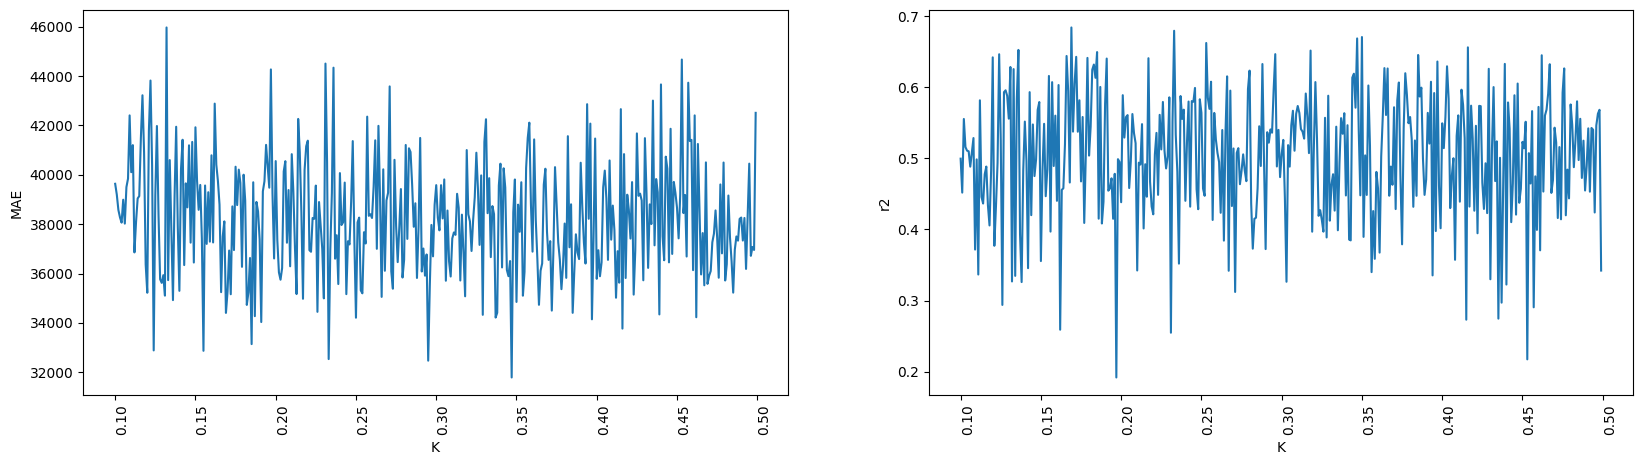

In [18]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### Univariate feature selection


### Statistic function (r_regression, f_regression, mutual_info_regression)

### 1. r_regression


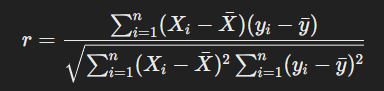

### Using numpy

In [19]:
def similitary_score(x,y):
    x_avg=np.average(x)
    y_avg=np.average(y)
    up=np.sum((x-x_avg)*(y-y_avg))
    down=np.sqrt(np.sum((x-x_avg)**2)*np.sum((y-y_avg)**2))
    return up/down

In [20]:
print(similitary_score(df["OverallQual"],df["SalePrice"]))

0.0304326175489076


In [21]:
top_feature=[]
for col in df.columns:
    score=similitary_score(df[col],df["SalePrice"])
    if col != "SalePrice" and score > 0.6:
        top_feature.append([col,score])
top_feature

C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_21624\2326211799.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return up/down


[]

### Using sklearn

In [22]:
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import SelectKBest
# for i in range(5,21):
fs=SelectKBest(r_regression,k=6)
fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
# selected=df.columns[fs.get_support()]
fs.get_feature_names_out()

array(['Neighborhood_NridgHt', 'ExterQual_Ex', 'ExterQual_Gd',
       'Foundation_PConc', 'BsmtQual_Ex', 'KitchenQual_Ex'], dtype=object)

In [23]:
k, mae, rmse, r2 = [], [], [], []

for i in range(5,120):
    fs=SelectKBest(r_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("r_regression_label_enc.csv")
statistic


,K,MAE,RMSE,r2
0,5,37666.195205,55938.945415,0.592043
1,6,44883.530822,78312.254101,0.200450
2,7,40320.486301,62393.008818,0.492474
3,8,38062.462329,59241.120325,0.542456
4,9,42470.962329,67287.063276,0.409732
...,...,...,...,...
110,115,42094.154110,70765.804717,0.347120
111,116,43238.592466,71277.225423,0.337650
112,117,39475.345890,69097.079241,0.377548
113,118,39335.215753,60365.547990,0.524923


In [24]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
15,20,32803.907534,48168.757868,0.697506
29,34,33435.472603,53845.276166,0.622009
86,91,34094.530822,52368.356080,0.642460
39,44,34908.520548,55129.800602,0.603759
6,11,34977.193493,56954.728126,0.577092
...,...,...,...,...
71,76,43202.636986,73711.815169,0.291630
111,116,43238.592466,71277.225423,0.337650
21,26,43817.770548,69501.799895,0.370235
1,6,44883.530822,78312.254101,0.200450


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_21624\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_21624\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


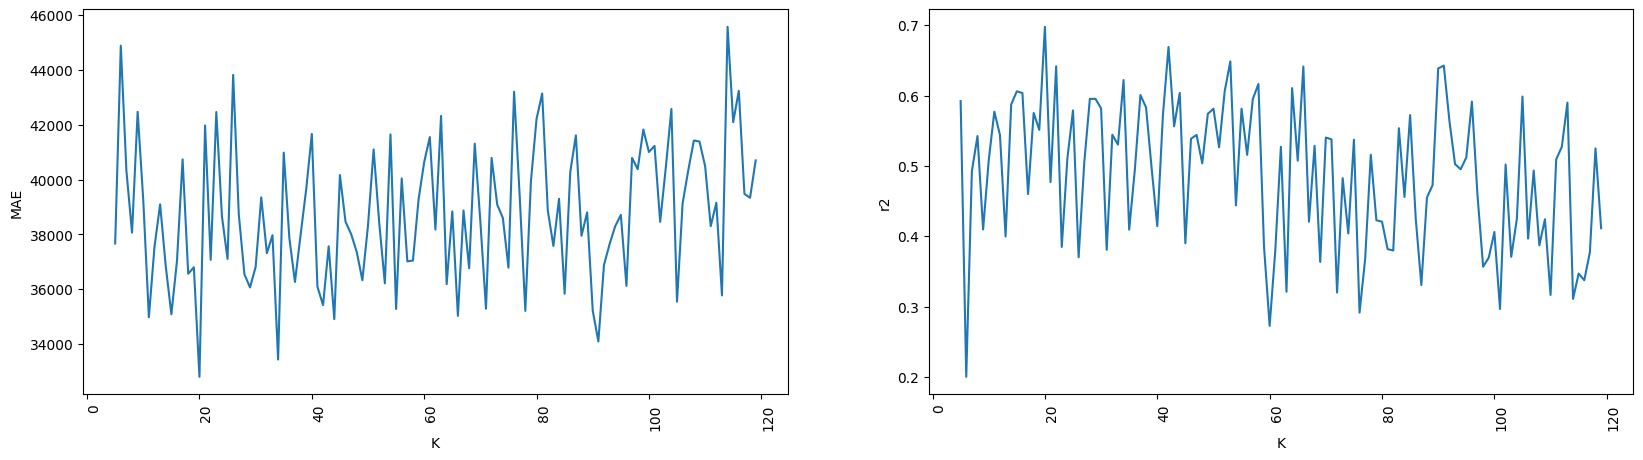

In [25]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 2.f_regression

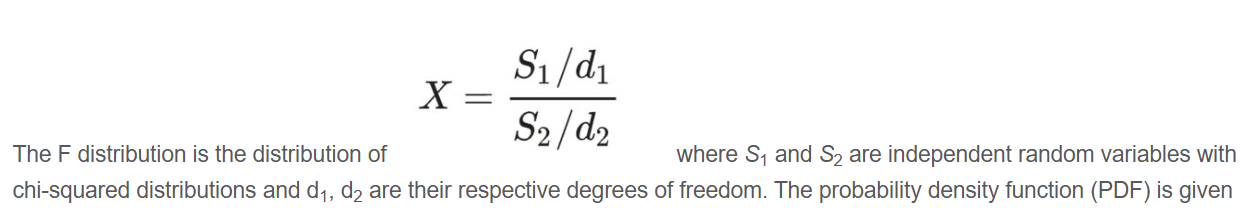

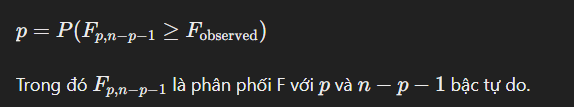

In [26]:
from sklearn.feature_selection import f_regression

In [27]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(f_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("f_regression_label_enc.csv")
statistic

,K,MAE,RMSE,r2
0,5,40771.556507,58034.646080,0.560903
1,6,39583.321918,56829.661589,0.578947
2,7,40035.938356,55532.789841,0.597945
3,8,38981.547945,53752.959851,0.623304
4,9,43839.085616,67838.432072,0.400019
...,...,...,...,...
110,115,39952.438356,65486.664348,0.440897
111,116,41607.078767,68934.307582,0.380478
112,117,37687.321918,58604.242790,0.552241
113,118,38174.773973,60393.846310,0.524477


In [28]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
72,77,33600.458904,51685.197305,0.651728
74,79,34665.342466,58411.728558,0.555178
107,112,34730.181507,53878.254449,0.621546
102,107,34749.191781,54524.956103,0.612406
54,59,34861.195205,51137.588255,0.659069
...,...,...,...,...
15,20,42647.054795,63563.797649,0.473248
37,42,43134.239726,62950.747249,0.483360
4,9,43839.085616,67838.432072,0.400019
19,24,44498.892123,68547.749435,0.387406


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_21624\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_21624\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


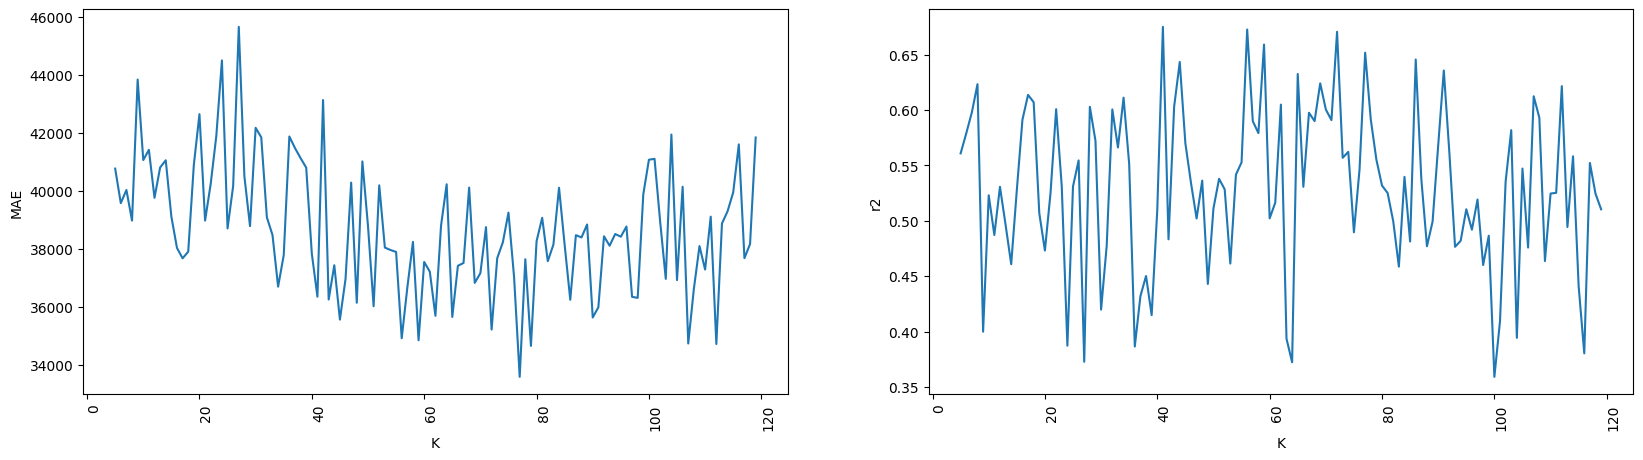

In [29]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 3.Mutual infomation

### Fomula

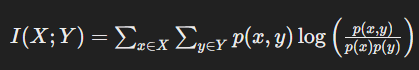

### Mesure dependency of 2 variable X,Y

### KDE method (Estimate Probability Density Function)

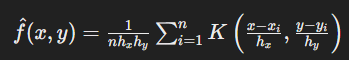

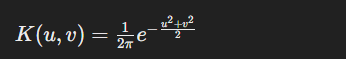

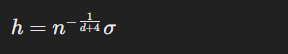

In [30]:
all_col=df.columns
all_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_WD', 'SaleType_nan', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'SaleCondition_nan',
       'SalePrice'],
      dtype='object', length=305)

In [31]:
from sklearn.feature_selection import mutual_info_regression

In [32]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(mutual_info_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,5,44956.099315,70596.397776,0.350243
1,6,42232.904110,62835.532033,0.485250
2,7,37288.650685,61418.811613,0.508199
3,8,42150.250000,64794.895838,0.452647
4,9,43580.791096,69222.183441,0.375292
...,...,...,...,...
110,115,38403.565068,62217.213114,0.495330
111,116,38476.934932,60551.798850,0.521986
112,117,38693.931507,58354.015765,0.556057
113,118,38823.301370,68659.545717,0.385406


In [33]:
statistic.to_csv("mutual_infomation_label_enc.csv")

In [34]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
88,93,33348.171233,49006.389091,0.686894
40,45,34171.982877,50453.677067,0.668127
85,90,34316.078767,60490.427729,0.522955
99,104,34520.339041,55434.393868,0.599369
20,25,35095.568493,53398.876291,0.628250
...,...,...,...,...
4,9,43580.791096,69222.183441,0.375292
10,15,43700.554795,68054.506033,0.396191
34,39,43773.712329,69167.332719,0.376282
38,43,44180.736301,68385.418086,0.390304


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_21624\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_21624\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


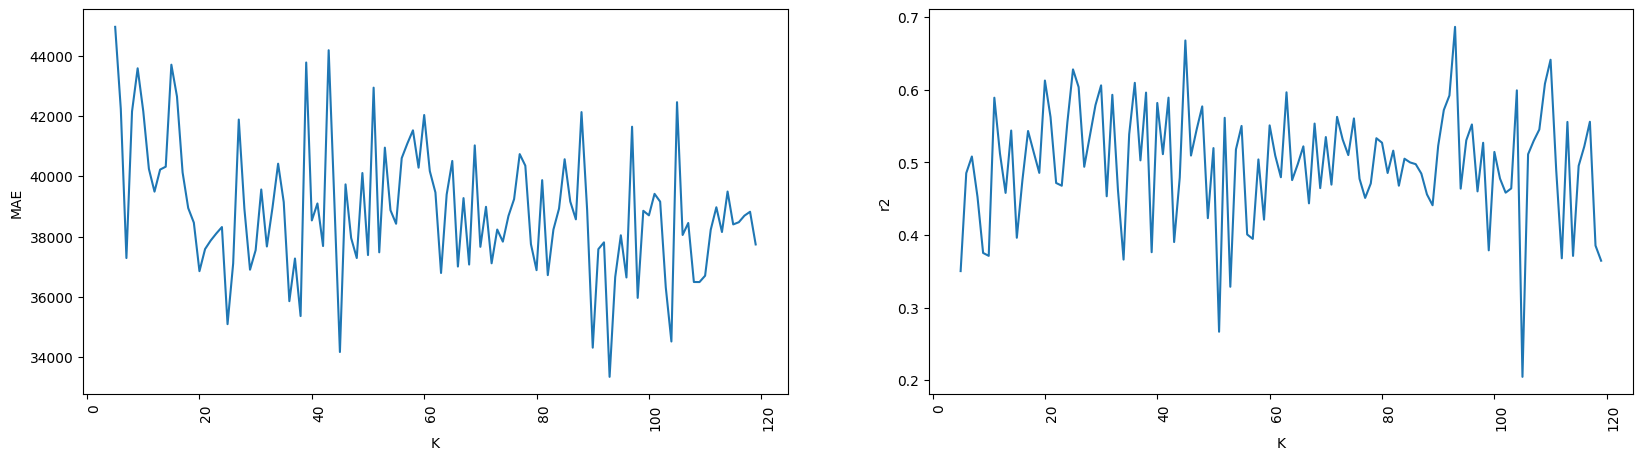

In [35]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### RFE (Recursive feature elimination)

df

from sklearn.feature_selection import RFE,RFECV
rfe=RFE(estimator=model,n_features_to_select=5)
rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
rfe.get_feature_names_out()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,50):
    rfe=RFE(estimator=model,n_features_to_select=i)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

statistic.to_csv("RFE.csv")

statistic=pd.read_csv("RFE.csv")

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,15):
    rfe=RFECV(estimator=model,min_features_to_select=i,cv=5)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

statistic.to_csv("RFECV.csv")

In [36]:
r=pd.read_csv("r_regression_label_enc.csv")
r=r.iloc[:,1:]
r

,K,MAE,RMSE,r2
0,5,31560.575342,50068.250848,0.673178
1,6,37268.369863,63118.426673,0.480604
2,7,31834.030822,50089.586562,0.672900
3,8,33577.784247,52015.322304,0.647265
4,9,32562.397260,46754.415034,0.715009
...,...,...,...,...
110,115,33832.448630,55431.215287,0.599415
111,116,34311.726027,52722.370015,0.637610
112,117,34871.212329,59317.920420,0.541269
113,118,33505.989726,56583.617992,0.582585


In [37]:
f=pd.read_csv("f_regression_label_enc.csv")
f=f.iloc[:,1:]
f

,K,MAE,RMSE,r2
0,5,29836.982877,46021.517796,0.723874
1,6,30975.407534,52537.408866,0.640148
2,7,28945.708904,42109.346665,0.768824
3,8,30102.448630,45378.980694,0.731530
4,9,29723.811644,48678.393565,0.691071
...,...,...,...,...
110,115,36689.190068,63031.086871,0.482041
111,116,32813.222603,50706.018896,0.664799
112,117,31002.445205,51795.635006,0.650238
113,118,33097.780822,52218.078533,0.644510


In [38]:
mutual=pd.read_csv("mutual_infomation_label_enc.csv")
mutual=mutual.iloc[:,1:]
mutual

,K,MAE,RMSE,r2
0,5,44956.099315,70596.397776,0.350243
1,6,42232.904110,62835.532033,0.485250
2,7,37288.650685,61418.811613,0.508199
3,8,42150.250000,64794.895838,0.452647
4,9,43580.791096,69222.183441,0.375292
...,...,...,...,...
110,115,38403.565068,62217.213114,0.495330
111,116,38476.934932,60551.798850,0.521986
112,117,38693.931507,58354.015765,0.556057
113,118,38823.301370,68659.545717,0.385406


In [39]:
joint=pd.merge(r,f,how='inner',on="K")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y
0,5,31560.575342,50068.250848,0.673178,29836.982877,46021.517796,0.723874
1,6,37268.369863,63118.426673,0.480604,30975.407534,52537.408866,0.640148
2,7,31834.030822,50089.586562,0.672900,28945.708904,42109.346665,0.768824
3,8,33577.784247,52015.322304,0.647265,30102.448630,45378.980694,0.731530
4,9,32562.397260,46754.415034,0.715009,29723.811644,48678.393565,0.691071
...,...,...,...,...,...,...,...
110,115,33832.448630,55431.215287,0.599415,36689.190068,63031.086871,0.482041
111,116,34311.726027,52722.370015,0.637610,32813.222603,50706.018896,0.664799
112,117,34871.212329,59317.920420,0.541269,31002.445205,51795.635006,0.650238
113,118,33505.989726,56583.617992,0.582585,33097.780822,52218.078533,0.644510


In [40]:
joint=pd.merge(joint,mutual,on="K",how="inner")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y,MAE,RMSE,r2
0,5,31560.575342,50068.250848,0.673178,29836.982877,46021.517796,0.723874,44956.099315,70596.397776,0.350243
1,6,37268.369863,63118.426673,0.480604,30975.407534,52537.408866,0.640148,42232.904110,62835.532033,0.485250
2,7,31834.030822,50089.586562,0.672900,28945.708904,42109.346665,0.768824,37288.650685,61418.811613,0.508199
3,8,33577.784247,52015.322304,0.647265,30102.448630,45378.980694,0.731530,42150.250000,64794.895838,0.452647
4,9,32562.397260,46754.415034,0.715009,29723.811644,48678.393565,0.691071,43580.791096,69222.183441,0.375292
...,...,...,...,...,...,...,...,...,...,...
110,115,33832.448630,55431.215287,0.599415,36689.190068,63031.086871,0.482041,38403.565068,62217.213114,0.495330
111,116,34311.726027,52722.370015,0.637610,32813.222603,50706.018896,0.664799,38476.934932,60551.798850,0.521986
112,117,34871.212329,59317.920420,0.541269,31002.445205,51795.635006,0.650238,38693.931507,58354.015765,0.556057
113,118,33505.989726,56583.617992,0.582585,33097.780822,52218.078533,0.644510,38823.301370,68659.545717,0.385406


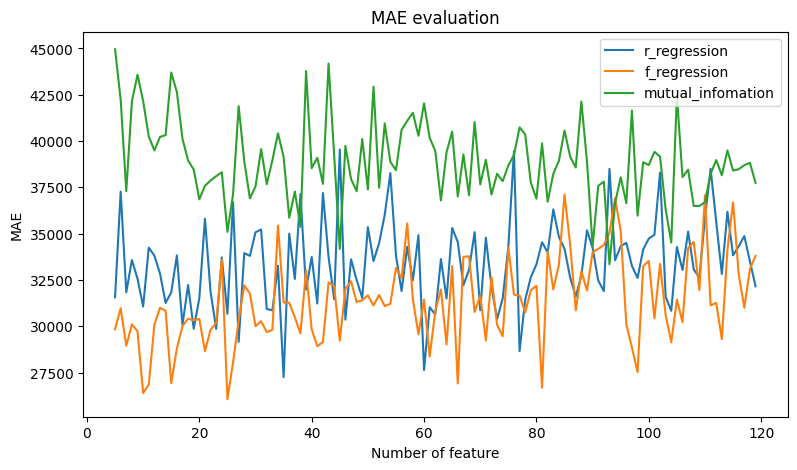

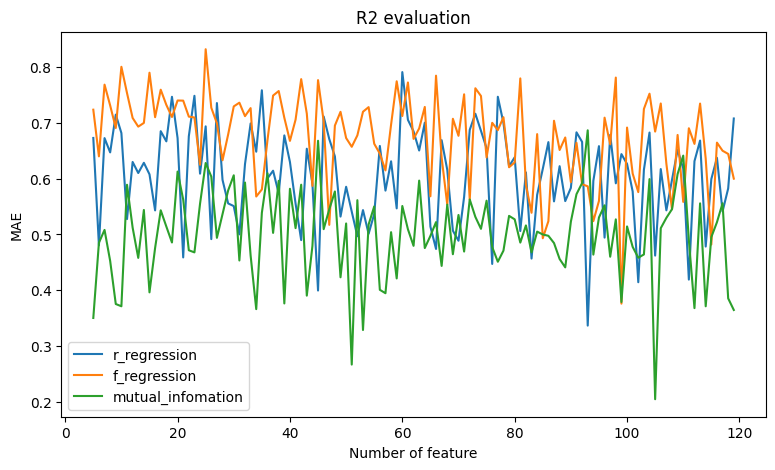

In [41]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(joint["K"],joint["MAE_x"],label="r_regression")
plt.plot(joint["K"],joint["MAE_y"],label="f_regression")
plt.plot(joint["K"],joint["MAE"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("MAE evaluation") 
plt.legend()
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(joint["K"],joint["r2_x"],label="r_regression")
plt.plot(joint["K"],joint["r2_y"],label="f_regression")
plt.plot(joint["K"],joint["r2"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("R2 evaluation") 
plt.legend()